In [52]:
#1. Importing libraries
#======================
# For data manipulation
import pandas as pd
from pandas import DataFrame
import numpy as np

# For regression
from sklearn.linear_model import LinearRegression
from sklearn import datasets
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error


# For plots
import matplotlib.pyplot as plt
import seaborn as sns
label_size = 8
plt.rcParams['xtick.labelsize'] = label_size 
%matplotlib inline

In [37]:
#2. Importing the data
#=======================

#data=pd.read_clipboard()
#data.to_csv('data.csv')
df=pd.read_csv('data.csv', header=None)
df=df.loc[:,2:13]

In [38]:
# preview of the data 
df.head()

,2,3,4,5,6,7,8,9,10,11,12,13
0,1991,Jan,162.1,29.1,1229,0,4,0.1,0.2,0.3,-0.002288,5600
1,1991,Feb,256.9,31.5,999,0,4,0.0,0.0,0.0,-0.002288,9463
2,1991,Mar,151.15,41.9,734,0,4,0.0,0.0,0.0,-0.002288,5154
3,1991,Apr,118.76,53.4,373,0,4,0.0,0.0,0.0,-0.000600,3576
4,1991,May,100.71,63.7,162,94,4,0.0,0.0,0.0,-0.000634,2894


In [39]:
# Renaming the columns
df.columns=['Year','Month','ElectricBill','Temperature','Heating','Cooling','NumOfPeopleHome',
            'NewMeter','NewheatPump1','NewHeatPump2','RiderTotal','ConsumptionTotal']
df.head()

,Year,Month,ElectricBill,Temperature,Heating,Cooling,NumOfPeopleHome,NewMeter,NewheatPump1,NewHeatPump2,RiderTotal,ConsumptionTotal
0,1991,Jan,162.1,29.1,1229,0,4,0.1,0.2,0.3,-0.002288,5600
1,1991,Feb,256.9,31.5,999,0,4,0.0,0.0,0.0,-0.002288,9463
2,1991,Mar,151.15,41.9,734,0,4,0.0,0.0,0.0,-0.002288,5154
3,1991,Apr,118.76,53.4,373,0,4,0.0,0.0,0.0,-0.000600,3576
4,1991,May,100.71,63.7,162,94,4,0.0,0.0,0.0,-0.000634,2894


In [40]:
# Information on shape and variables data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 12 columns):
Year                120 non-null int64
Month               120 non-null object
ElectricBill        120 non-null object
Temperature         120 non-null float64
Heating             120 non-null int64
Cooling             120 non-null int64
NumOfPeopleHome     120 non-null int64
NewMeter            120 non-null float64
NewheatPump1        120 non-null float64
NewHeatPump2        120 non-null float64
RiderTotal          120 non-null float64
ConsumptionTotal    120 non-null int64
dtypes: float64(5), int64(5), object(2)
memory usage: 11.3+ KB


In [41]:
# cleaning up the electric bill column, it has one value with "*" and it's not numeric
df.ElectricBill[df.ElectricBill=='*']=np.nan
df.ElectricBill=pd.to_numeric(df.ElectricBill)
df.ElectricBill[36]=df.ElectricBill.mean()
df.ElectricBill[36]

/Users/fabienneishimwe/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/fabienneishimwe/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


100.61033613445382

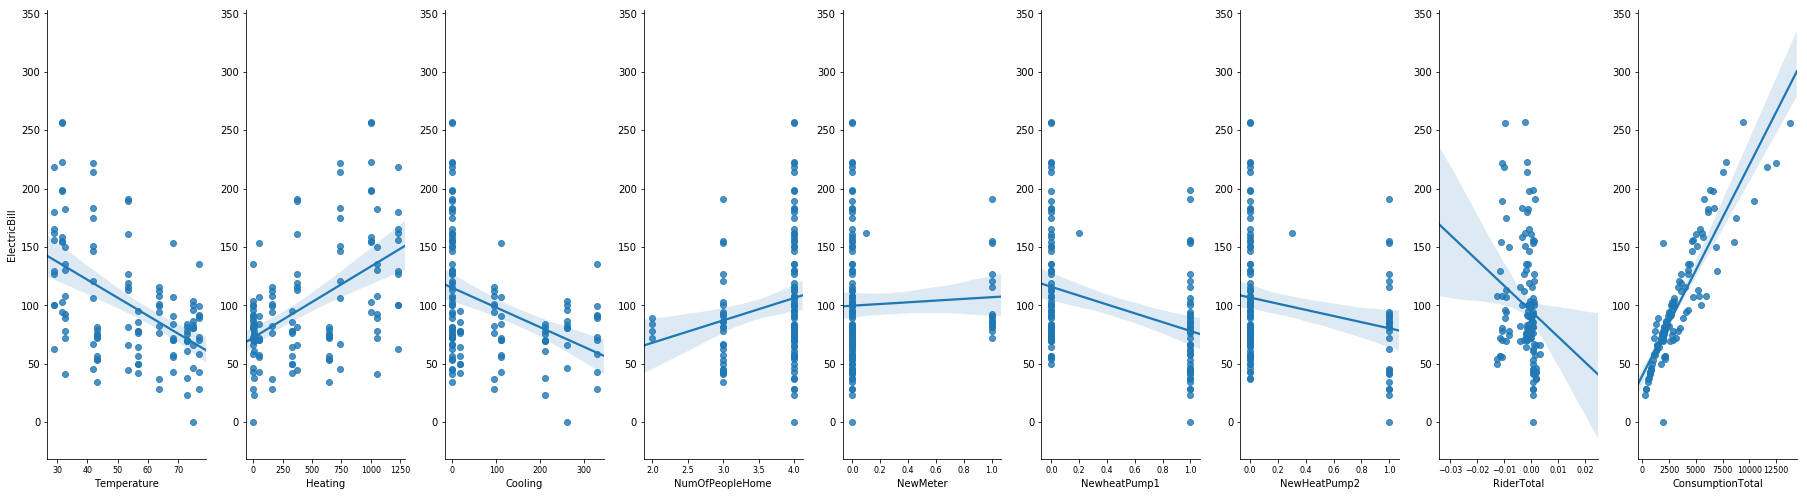

In [81]:
# Visualizing the relationship between features and the target variable 


sns.pairplot(df,kind='reg',x_vars=['Temperature','Heating','Cooling','NumOfPeopleHome',
            'NewMeter','NewheatPump1','NewHeatPump2','RiderTotal','ConsumptionTotal'], y_vars='ElectricBill',size=7,aspect=0.4)

In [127]:
# Exploring and relationship between Consumption & Bill and  a simple linear regression model creation 
X=df.iloc[:, [11]]
y=df['ElectricBill']

X_train,X_test,y_train,y_test= train_test_split(X,y, test_size=0.2, random_state=0)

lm=LinearRegression()
model=lm.fit(X_train,y_train)
predictions=lm.predict(X_test)
mse=mean_squared_error(y_test, predictions)
score=lm.score(X_test, y_test)
v={'Mean Squared Error':mse,'Intercept':lm.intercept_,'Coeficient':lm.coef_, 'score':score}
equ=pd.DataFrame(v)
print (equ)

X_test=X_test.T.squeeze()
d = {'Actual Bill': y_test,'Predicted Bill':predictions, 'consumptionTotal':X_test}
table =pd.DataFrame(d)
print ('\n\n',table)


   Coeficient  Intercept  Mean Squared Error     score
0    0.018944  37.177976          471.189067  0.826097


      Actual Bill  Predicted Bill  consumptionTotal
48        129.06      169.407504              6980
94         34.49       47.047831               521
95         40.97       50.097824               682
8          71.59       70.784736              1774
97         93.90       84.500234              2498
22         75.54       75.823856              2040
7         103.64       93.744935              2986
10         78.83       76.808947              2092
45         56.47       78.021366              2156
89         37.88       48.184474               581
33         64.62       67.469526              1599
50        174.80      202.957432              8751
2         151.15      134.815654              5154
60        218.67      257.762593             11644
119        89.49       64.874190              1462
74        106.51       93.366054              2966
30        134.99    

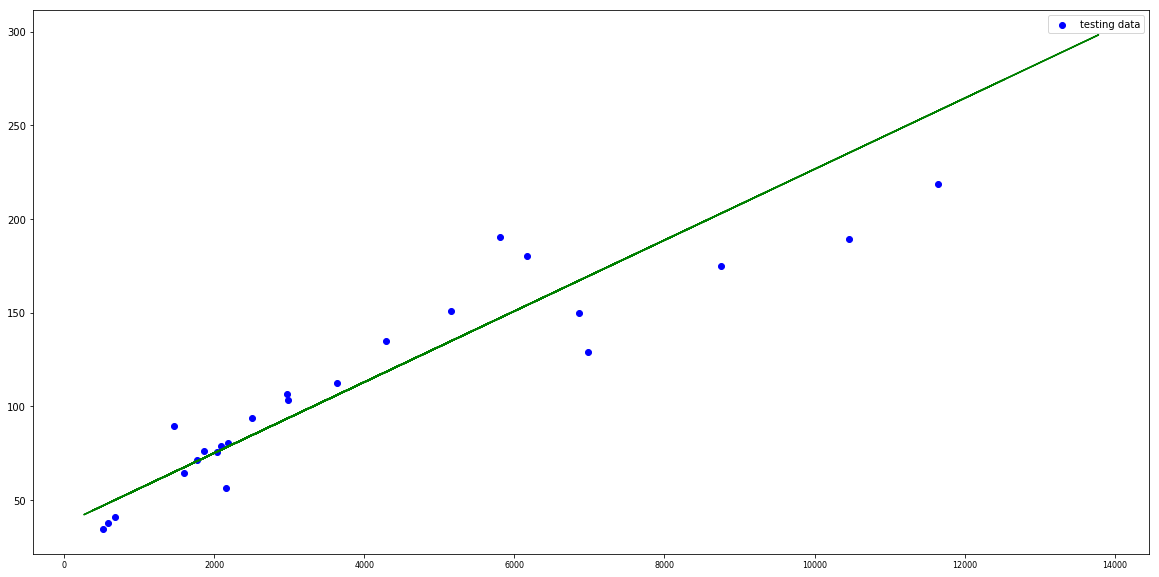

In [82]:
#plotting the model with  matplotlib
plt.figure(figsize=(20,10)) 

#plt.scatter(X_train,y_train,color='red', label='training data')
plt.scatter(X_test,y_test,color='blue', label="testing data")
plt.plot(X_train,lm.predict(X_train),color='green')

plt.legend()


In [153]:
# . Creating same model with statsmodel instead for hypothesis testing

X=df.iloc[:,[11]]
y=df['ElectricBill']

X_train,X_test,y_train,y_test= train_test_split(X,y, test_size=0.2, random_state=0)
import statsmodels.api as sm
lms=sm.OLS(y_train,X_train).fit()
print(lms.params)
print ('R Squared\n============\n', lms.rsquared)

#predictions
predictions1=lms.predict(X_test)
X_test=X_test.T.squeeze()
d = {'Actual Bill': y_test,'Predicted Bill':predictions1, 'consumptionTotal':X_test}
table =pd.DataFrame(d)
print ('\n\n',table)

ConsumptionTotal    0.02634
dtype: float64
R Squared
 0.919087728404


      Actual Bill  Predicted Bill  consumptionTotal
48        129.06      183.851123              6980
94         34.49       13.722985               521
95         40.97       17.963677               682
8          71.59       46.726632              1774
97         93.90       65.796577              2498
22         75.54       53.732993              2040
7         103.64       78.650351              2986
10         78.83       55.102658              2092
45         56.47       56.788398              2156
89         37.88       15.303367               581
33         64.62       42.117184              1599
50        174.80      230.498736              8751
2         151.15      135.754826              5154
60        218.67      306.699495             11644
119        89.49       38.508645              1462
74        106.51       78.123557              2966
30        134.99      113.102682              4294
43        

In [145]:

# Hypothesis testing

#H0: There is no relationship between consumption and bill : coeffficient =0
#HA: There is a relationship between consumption and bill : coefficient !=0


print ('Confidence Intervals for 95% confidence level\n=============================================\n',lms.conf_int())
print('\nP value for 95% confidence level\n=============================================\n',lms.pvalues)

print( '\nConclusion\n===========\n since Confidence interval does not contain 0 and consequently p-value is less than 5%, we reject H0 and conclude that there is a relationship between consumption and Bill')

Confidence Intervals for 95% confidence level
                          0         1
ConsumptionTotal  0.024748  0.027932

P value for 95% confidence level
 ConsumptionTotal    1.149602e-53
dtype: float64

Conclusion
 since Confidence interval does not contain 0 and consequently p-value is less than 5%, we reject H0 and conclude that there is a relationship between consumption and Bill


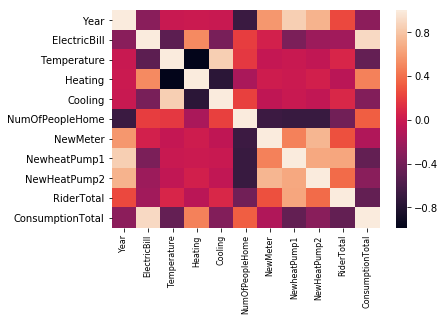

In [148]:
# Multi Linear Regression

# An overview or correlation between variables

corr = df.corr()
corr
# plot the heatmap
sns.heatmap(corr)

In [150]:
# Creatig a model with all features involved

# Defining the features and target variable
X2=df.iloc[:,[3,4,5,6,7,8,9,10,11]]
y2=df.ElectricBill
X2.head()

,Temperature,Heating,Cooling,NumOfPeopleHome,NewMeter,NewheatPump1,NewHeatPump2,RiderTotal,ConsumptionTotal
0,29.1,1229,0,4,0.1,0.2,0.3,-0.002288,5600
1,31.5,999,0,4,0.0,0.0,0.0,-0.002288,9463
2,41.9,734,0,4,0.0,0.0,0.0,-0.002288,5154
3,53.4,373,0,4,0.0,0.0,0.0,-0.000600,3576
4,63.7,162,94,4,0.0,0.0,0.0,-0.000634,2894


In [151]:
# model creation
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X2,y2, test_size=0.2, random_state=0)
lm2=LinearRegression()
model=lm2.fit(X_train,y_train)
predictions2=lm2.predict(X_test)

mse=mean_squared_error(y_test, predictions2)

print ('Intercept\n============\n', lm2.intercept_)

print ('\nFeature Coefficients \n======================\n',list(zip(X_train.columns,lm2.coef_)))

Intercept
 131.009394192

Feature Coefficients 
 [('Temperature', -1.1820002004916883), ('Heating', -0.030008257701599581), ('Cooling', 0.02007259582442256), ('NumOfPeopleHome', 0.086458326116192072), ('NewMeter', 36.100758931962744), ('NewheatPump1', -19.439449588266907), ('NewHeatPump2', -17.626017836426652), ('RiderTotal', 4068.5397707483221), ('ConsumptionTotal', 0.018634032018932597)]


In [158]:
# . Creating same model with statsmodel 
# Defining the features and target variable
X3=df.iloc[:,[3,4,5,6,7,8,9,10,11]]
y3=df.ElectricBill
X_train,X_test,y_train,y_test= train_test_split(X3,y3, test_size=0.2, random_state=0)

lms2=sm.OLS(y_train,X_train).fit()
print(lms2.params)
print ('R Squared\n============\n', lms2.rsquared)

#predictions
predictions2=lms2.predict(X_test)
X_test=X_test.T.squeeze()
d = {'Actual Bill': y_test,'Predicted Bill':predictions2}
table =pd.DataFrame(d)
print ('\n\n',table)
print( lms2.summary())

Temperature            0.716919
Heating                0.029355
Cooling               -0.049773
NumOfPeopleHome        1.562934
NewMeter              37.360923
NewheatPump1         -17.827171
NewHeatPump2         -18.227824
RiderTotal          4013.076904
ConsumptionTotal       0.018936
dtype: float64
R Squared
 0.983441759575


      Actual Bill  Predicted Bill
48        129.06      149.548987
94         34.49       31.600908
95         40.97       38.795708
8          71.59       83.033986
97         93.90       70.789418
22         75.54       87.170803
7         103.64      101.673398
10         78.83       91.791303
45         56.47       49.864318
89         37.88       49.266756
33         64.62       78.424215
50        174.80      186.133035
2         151.15      146.249620
60        218.67      244.377907
119        89.49       86.293472
74        106.51       98.641291
30        134.99      121.519458
43         80.28       82.667211
111       190.62      171.433405
76      